# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
red_wine = pd.read_csv("./data/winequality-red.csv", sep=';')
white_wine = pd.read_csv("./data/winequality-white.csv", sep=';')

## Search for Duplicates and Missing Values

In [3]:
# Search for missing values
missing_red = red_wine.isnull().sum()
missing_white = white_wine.isnull().sum()

# Search for duplicates 
duplicates_red = red_wine.duplicated().sum()
duplicates_white = white_wine.duplicated().sum()

print(f"\nMissing values in red wine dataset:\n{missing_red[missing_red > 0]}")
print(f"\nMissing values in white wine dataset:\n{missing_white[missing_white > 0]}")

print(f"\nDuplicates in red wine dataset: {duplicates_red}")
print(f"\nDuplicates in white wine dataset: {duplicates_white}")


Missing values in red wine dataset:
Series([], dtype: int64)

Missing values in white wine dataset:
Series([], dtype: int64)

Duplicates in red wine dataset: 240

Duplicates in white wine dataset: 937


## Data cleaning
We remove duplicates from the dataframes, and outliers whose values exceed the law limits for European Union. In particular, it removes rows with Total Sulfur Dioxide higher than 250 mg/L for white wines with >5 g/L of sugar, and red wines with total sulfur dioxide higher than 200 mg/L and sugar >5 g/L of sugar, according to the regulations in https://www.researchgate.net/figure/Upper-limits-for-total-sulfur-dioxide-SO2-in-wines-in-major-winemaking-regions_tbl1_341521486.

In [4]:
# cleaning red wine data
red_wine = red_wine.drop_duplicates()
red_wine = red_wine[(red_wine['total sulfur dioxide'] <= 200) & (red_wine['residual sugar'] <= 5)]

# cleaning white wine data
white_wine = white_wine.drop_duplicates()
white_wine = white_wine[(white_wine['total sulfur dioxide'] <= 250) & (white_wine['residual sugar'] < 5 )]

# Merge datasets after cleaning
merged_data = pd.concat([red_wine, white_wine], axis=0, ignore_index=True)

# Save cleaned datasets
red_wine.to_csv("./data/cleaned_red_wine.csv", index=False)
white_wine.to_csv("./data/cleaned_white_wine.csv", index=False)
merged_data.to_csv("./data/cleaned_merged_wine.csv", index=False)

## Data summary

In [5]:
# Display basic information
print("RED WINE SUMMARY:")
print(red_wine.info())
print(red_wine.describe())

print("\nWHITE WINE SUMMARY:")
print(white_wine.info())
print(white_wine.describe())

print("\nMERGED DATA SUMMARY:")
print(merged_data.info())
print(merged_data.describe())

RED WINE SUMMARY:
<class 'pandas.core.frame.DataFrame'>
Index: 1293 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1293 non-null   float64
 1   volatile acidity      1293 non-null   float64
 2   citric acid           1293 non-null   float64
 3   residual sugar        1293 non-null   float64
 4   chlorides             1293 non-null   float64
 5   free sulfur dioxide   1293 non-null   float64
 6   total sulfur dioxide  1293 non-null   float64
 7   density               1293 non-null   float64
 8   pH                    1293 non-null   float64
 9   sulphates             1293 non-null   float64
 10  alcohol               1293 non-null   float64
 11  quality               1293 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 131.3 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1293.000000       1293.00000

## Feature Distribution Histograms

<Figure size 1200x500 with 0 Axes>

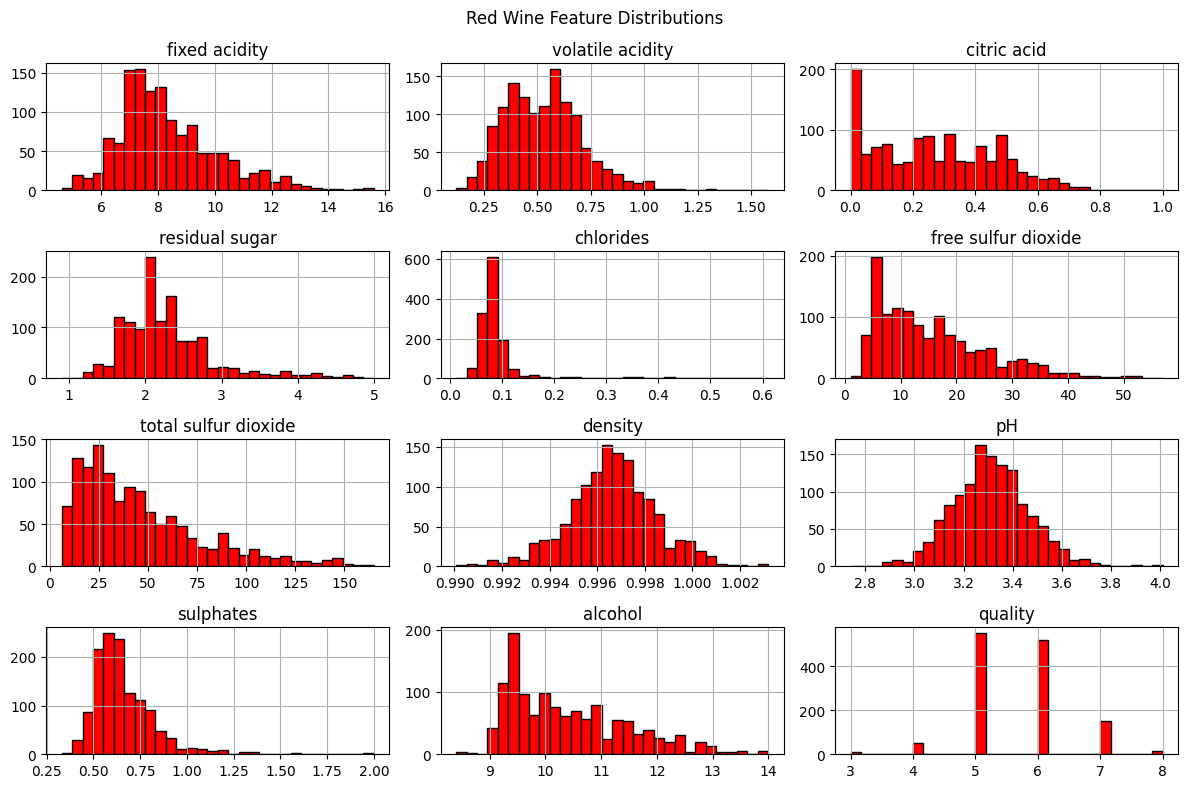

<Figure size 1200x500 with 0 Axes>

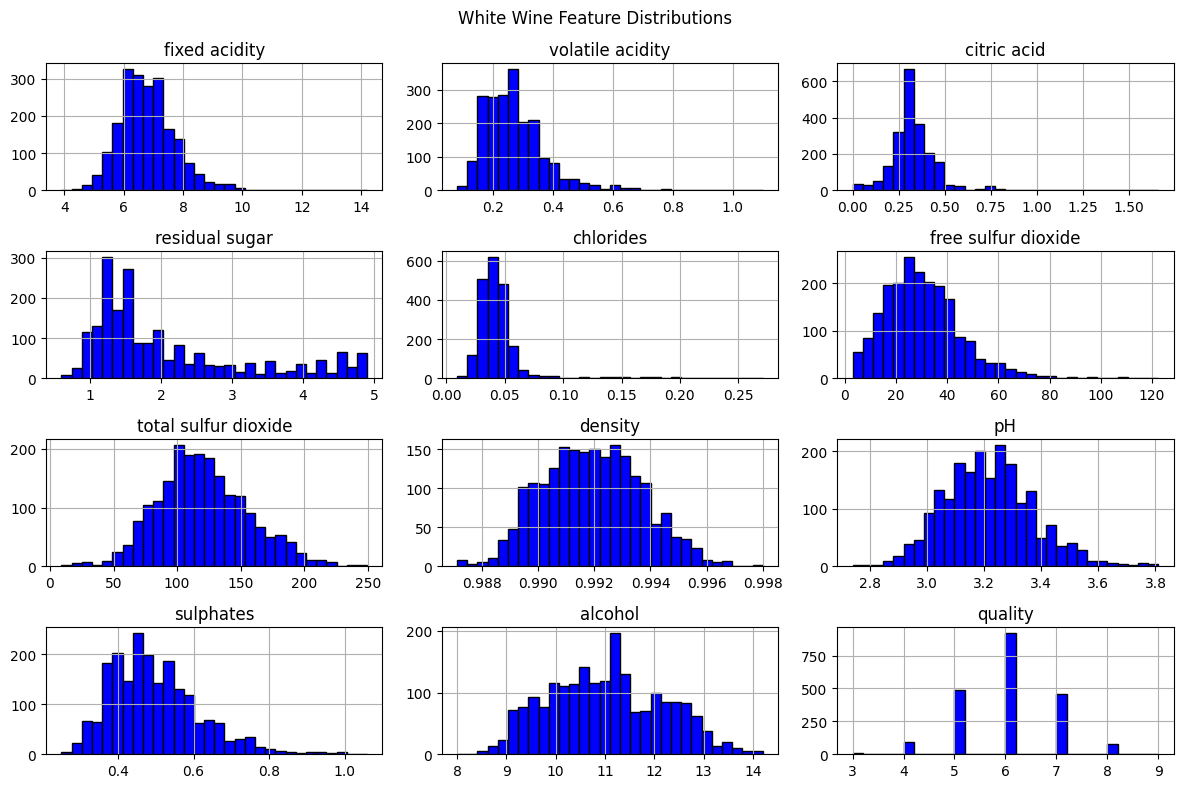

<Figure size 1200x500 with 0 Axes>

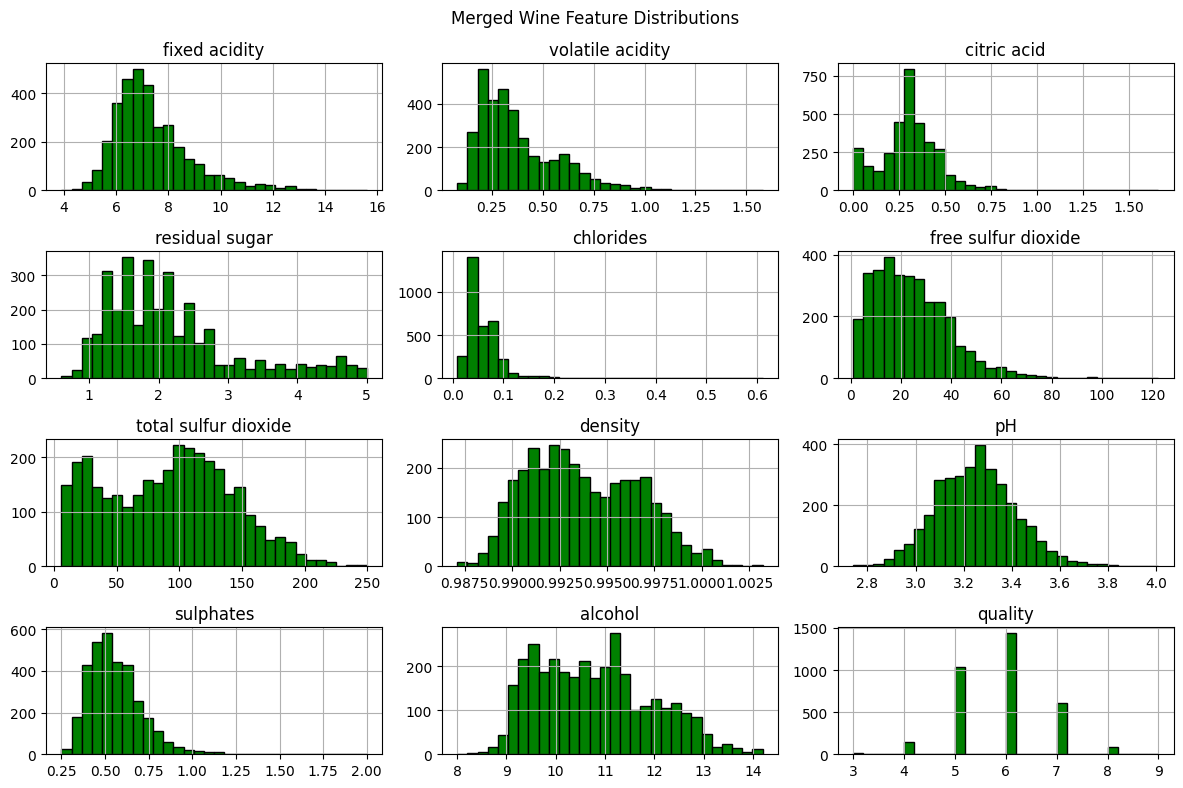

In [6]:
# Histogram for feature distributions
# RED
plt.figure(figsize=(12, 5))
red_wine.hist(bins=30, edgecolor='black', color='red', figsize=(12, 8))
plt.suptitle("Red Wine Feature Distributions")
plt.tight_layout()
plt.savefig("./figures/red_wine_histogram.png")
plt.show()

# WHITE
plt.figure(figsize=(12, 5))
white_wine.hist(bins=30, edgecolor='black', color='blue', figsize=(12, 8))
plt.suptitle("White Wine Feature Distributions")
plt.tight_layout()
plt.savefig("./figures/white_wine_histogram.png")
plt.show()

# MERGED
plt.figure(figsize=(12, 5))
merged_data.hist(bins=30, edgecolor='black', color='green', figsize=(12, 8))
plt.suptitle("Merged Wine Feature Distributions")
plt.tight_layout()
plt.savefig("./figures/merged_wine_histogram.png")
plt.show()


## Box Plots for Outlier Detection

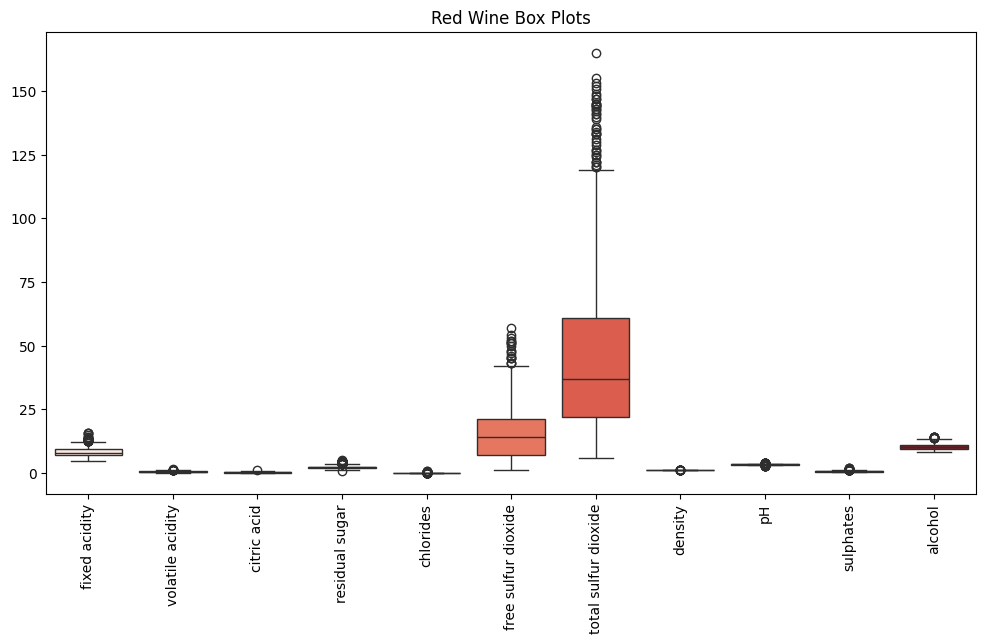

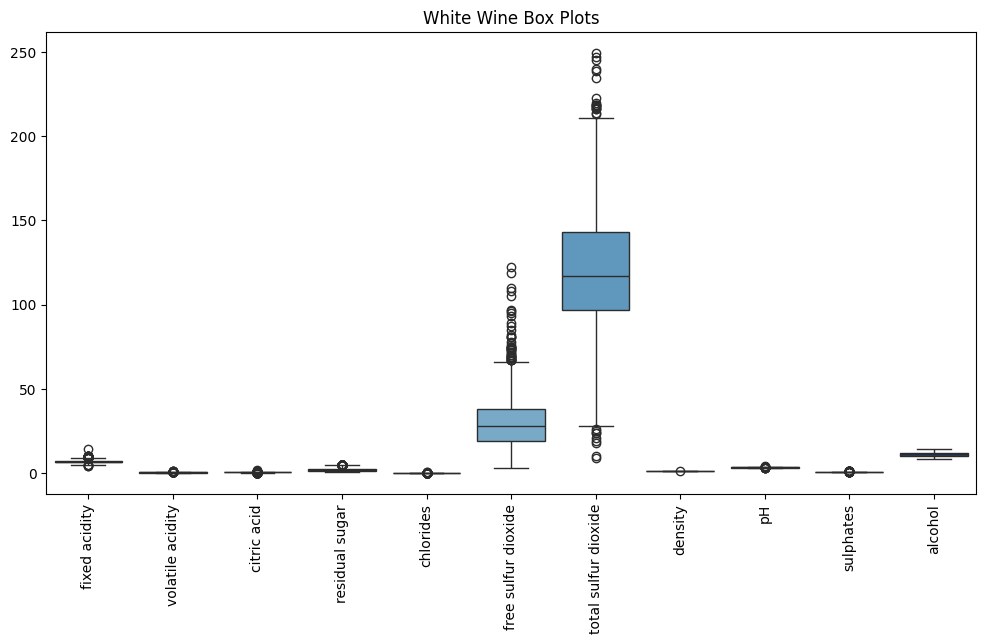

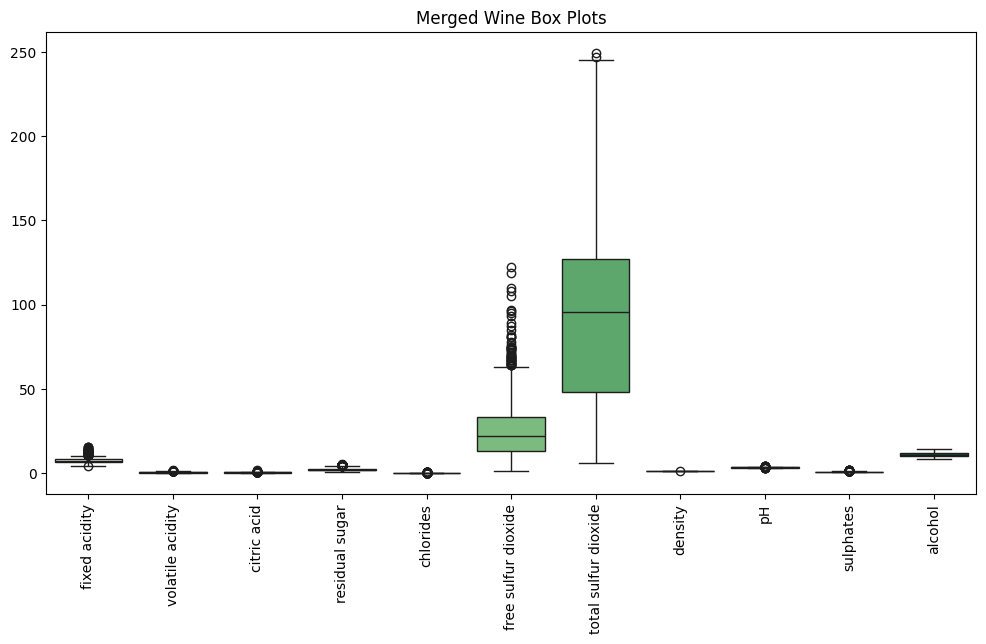

In [7]:
# Box plot for outlier detection
# RED
plt.figure(figsize=(12, 6))
sns.boxplot(data=red_wine.drop(columns=['quality']), palette='Reds')
plt.xticks(rotation=90)
plt.title("Red Wine Box Plots")
plt.savefig("./figures/red_wine_boxplot.png")
plt.show()

# WHITE
plt.figure(figsize=(12, 6))
sns.boxplot(data=white_wine.drop(columns=['quality']), palette='Blues')
plt.xticks(rotation=90)
plt.title("White Wine Box Plots")
plt.savefig("./figures/white_wine_boxplot.png")
plt.show()

# MERGED
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data.drop(columns=['quality']), palette='Greens')
plt.xticks(rotation=90)
plt.title("Merged Wine Box Plots")
plt.savefig("./figures/merged_wine_boxplot.png")
plt.show()

## Correlation Heatmaps of Variables

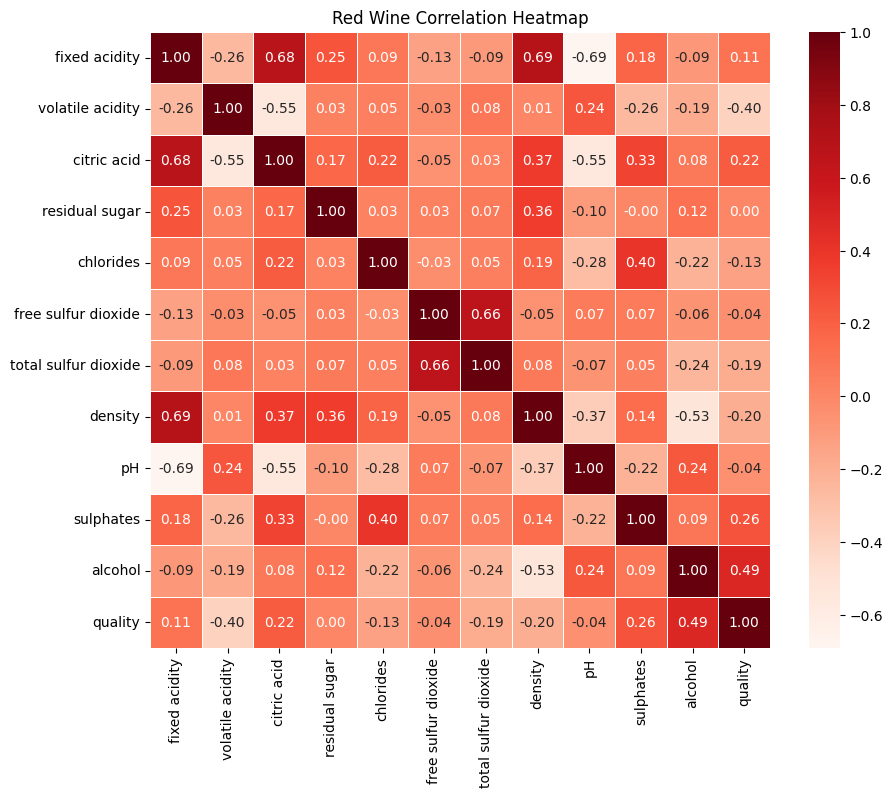

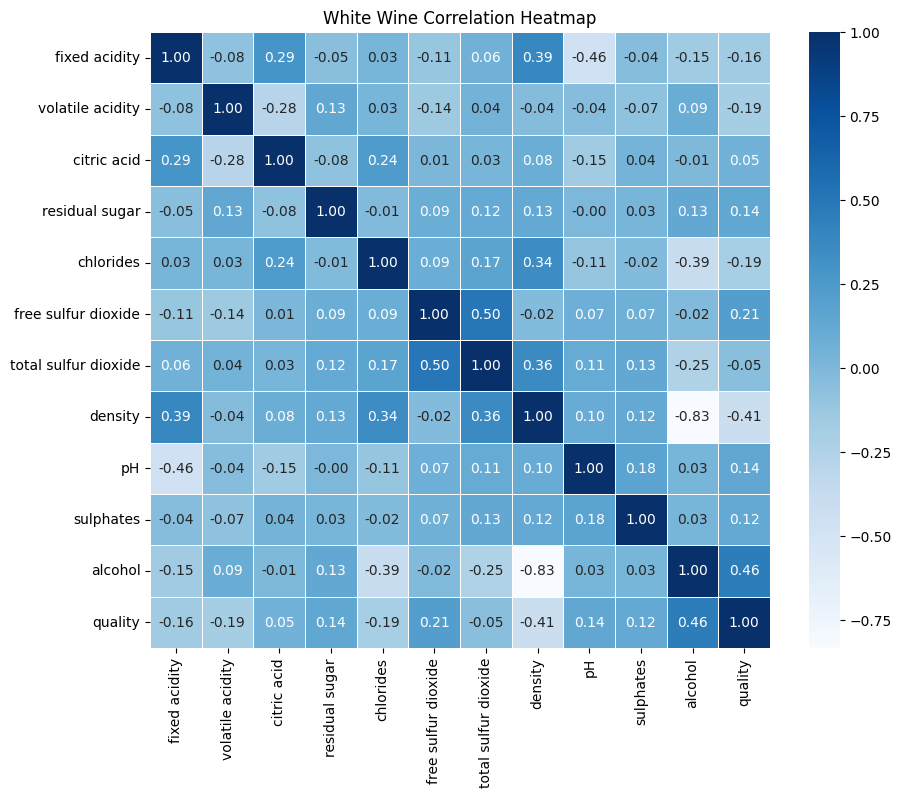

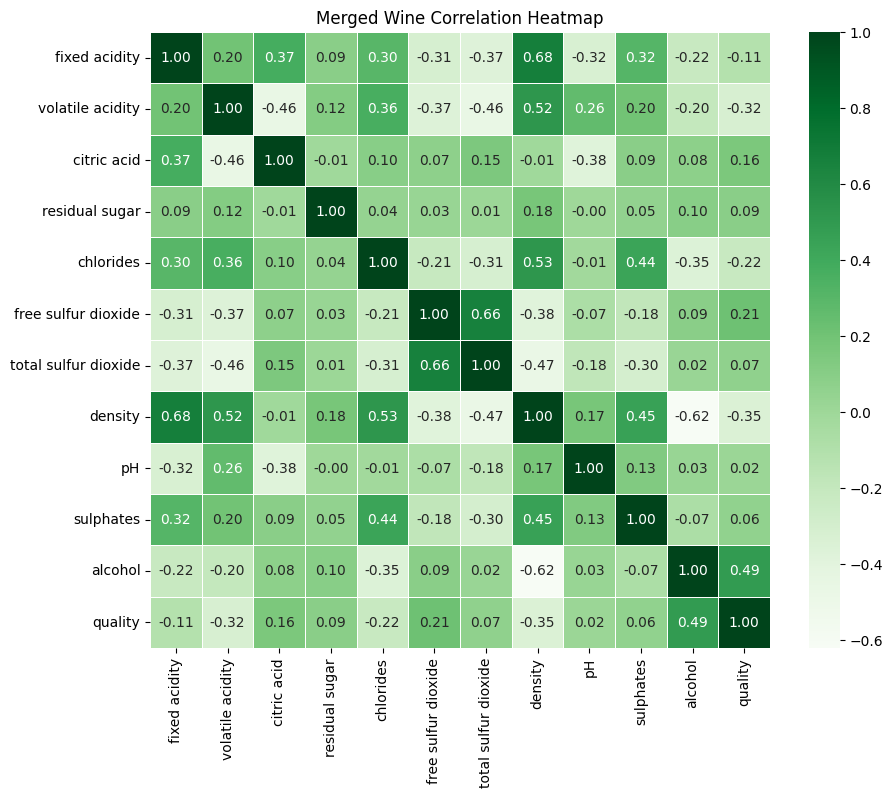

In [8]:
# Correlation heatmap for red wine
plt.figure(figsize=(10, 8))
sns.heatmap(red_wine.corr(), annot=True, cmap='Reds', fmt='.2f', linewidths=0.5)
plt.title("Red Wine Correlation Heatmap")
plt.savefig("./figures/red_wine_correlation_heatmap.png")
plt.show()

# Correlation heatmap for white wine
plt.figure(figsize=(10, 8))
sns.heatmap(white_wine.corr(), annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title("White Wine Correlation Heatmap")
plt.savefig("./figures/white_wine_correlation_heatmap.png")
plt.show()

# Correlation heatmap for merged data
plt.figure(figsize=(10, 8))
sns.heatmap(merged_data.corr(), annot=True, cmap='Greens', fmt='.2f', linewidths=0.5)
plt.title("Merged Wine Correlation Heatmap")
plt.savefig("./figures/merged_wine_correlation_heatmap.png")
plt.show()

## Pair Plots of Features

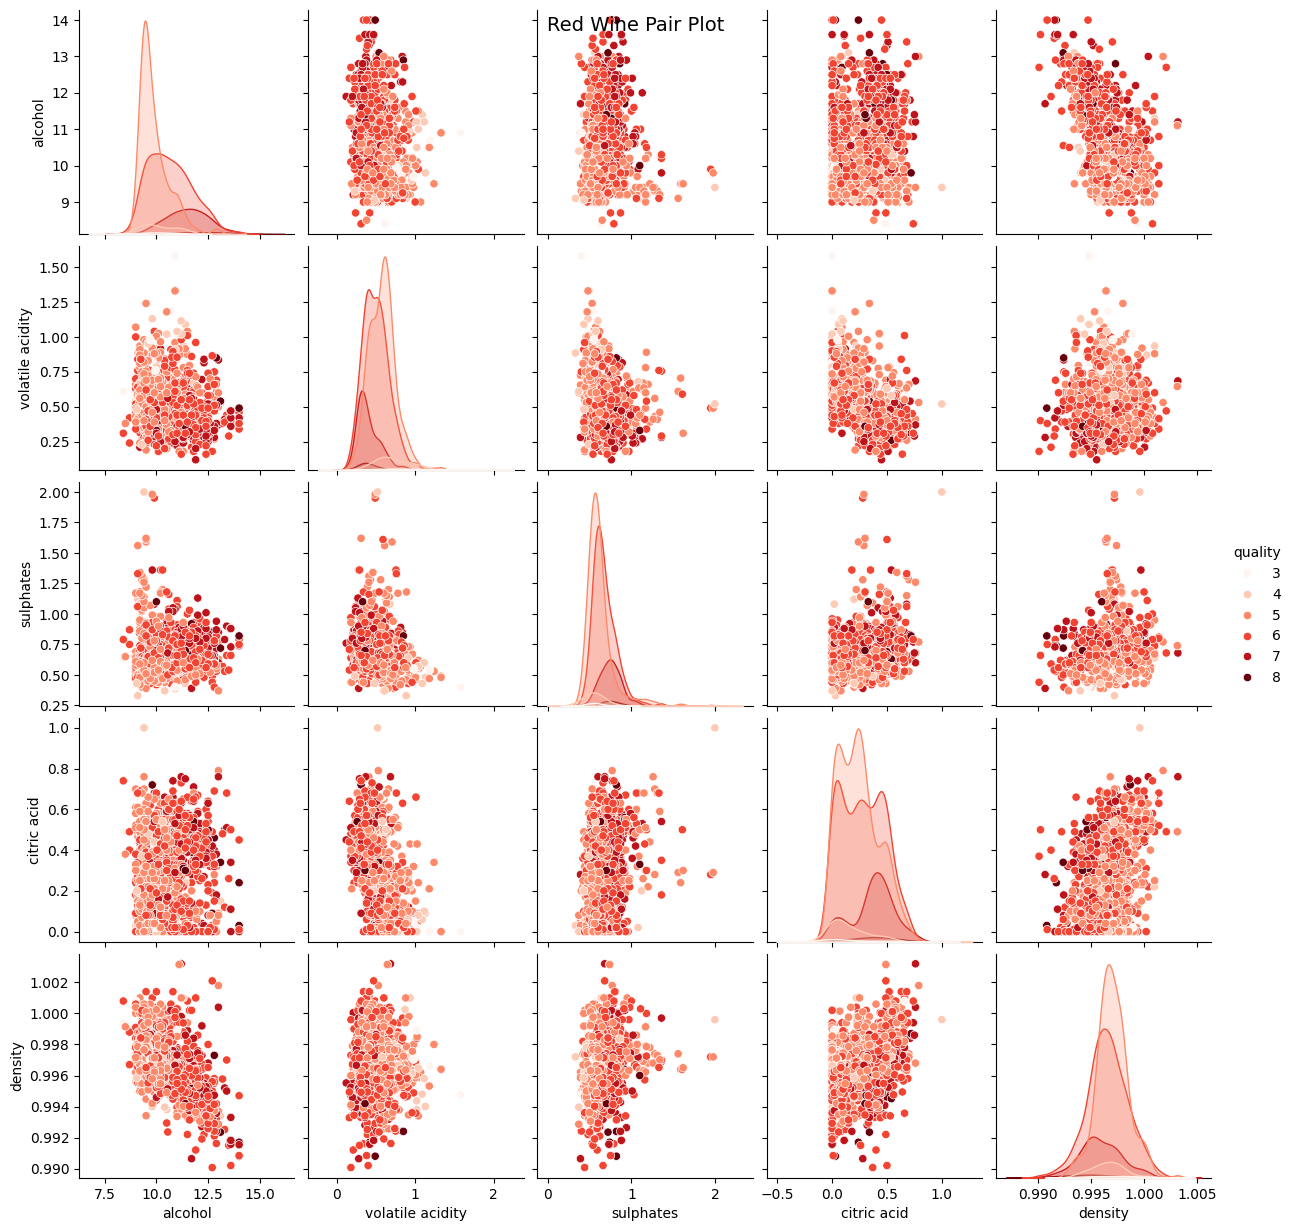

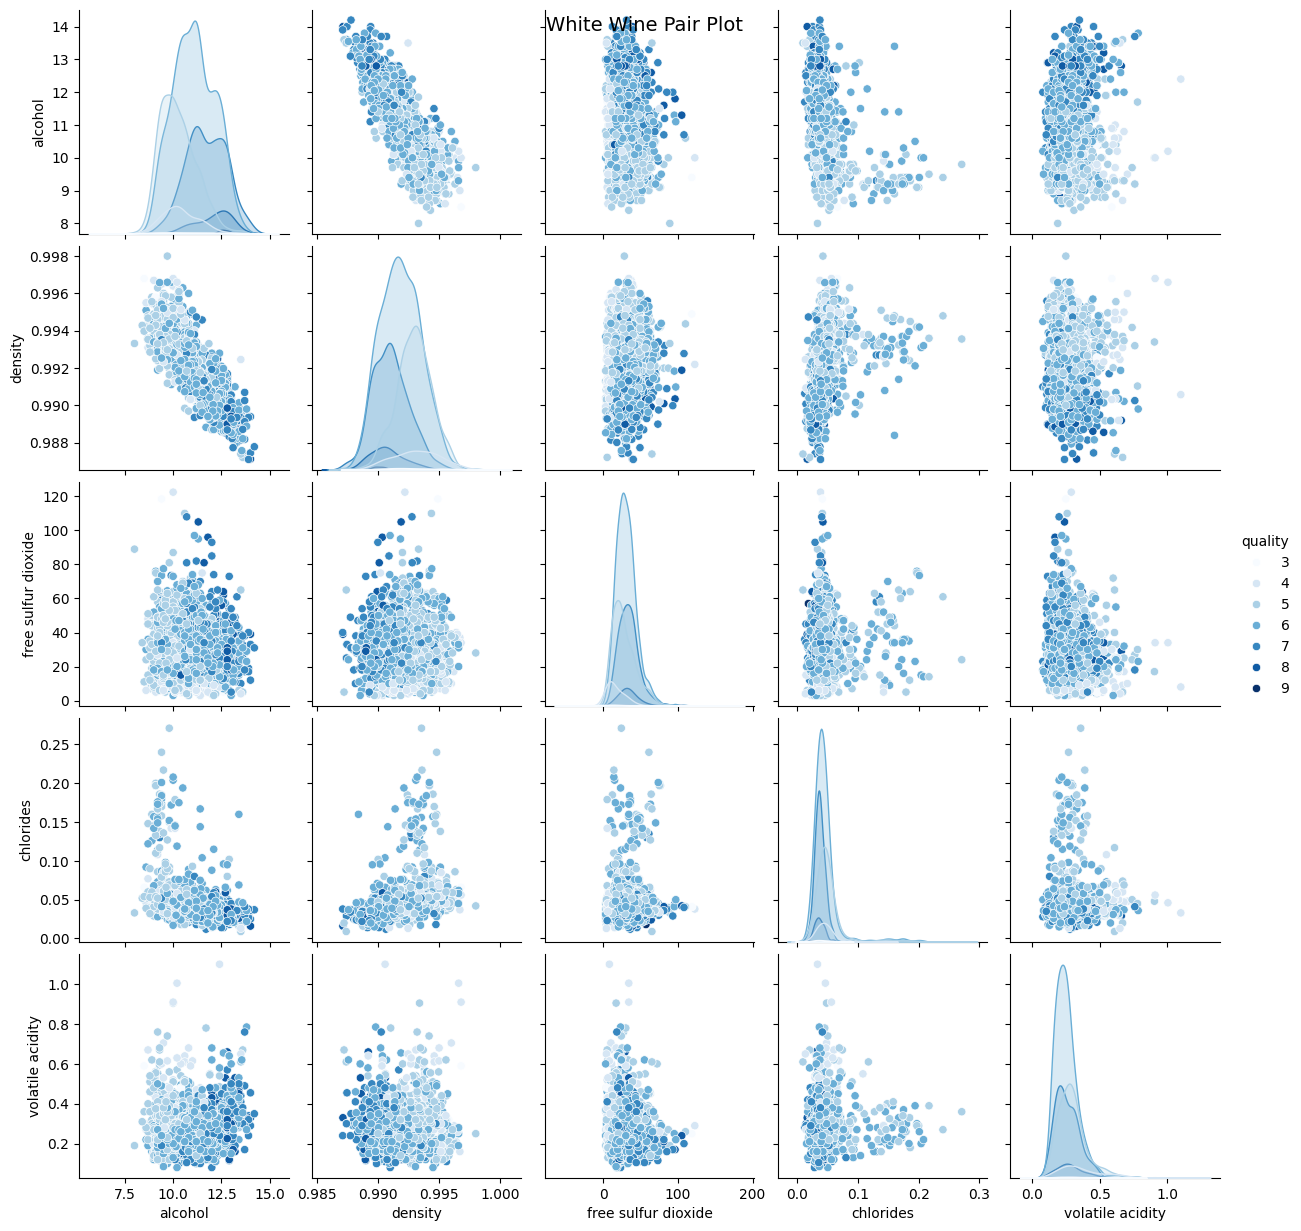

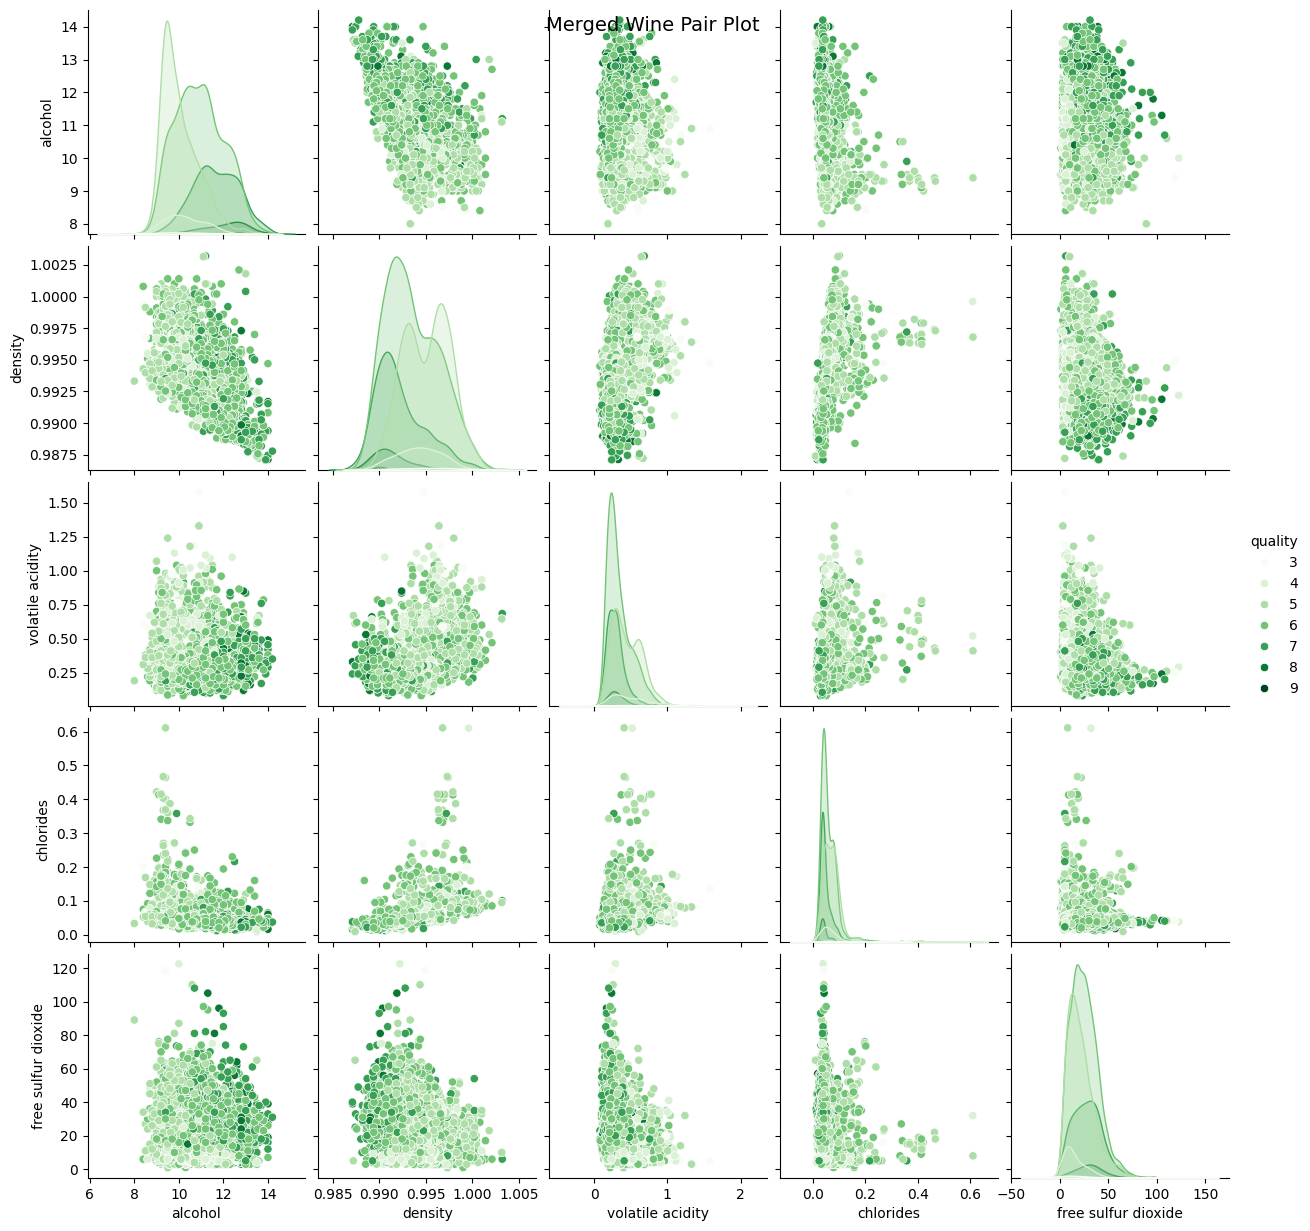

In [9]:
# Pair plots for selected features
# Select the top 5 features based on correlation with quality (both positive and negative)

red_selected_features = red_wine.corr()['quality'].abs().sort_values(ascending=False) # uses absolute values
sns.pairplot(red_wine[red_selected_features.index[:6]], hue='quality', palette='Reds')
plt.suptitle("Red Wine Pair Plot", fontsize=14)
plt.savefig("./figures/red_wine_pairplot.png")
plt.show()

white_selected_features = white_wine.corr()['quality'].abs().sort_values(ascending=False)
sns.pairplot(white_wine[white_selected_features.index[:6]], hue='quality', palette='Blues')
plt.suptitle("White Wine Pair Plot", fontsize=14)
plt.savefig("./figures/white_wine_pairplot.png")
plt.show()

merged_selected_features = merged_data.corr()['quality'].abs().sort_values(ascending=False)
sns.pairplot(merged_data[merged_selected_features.index[:6]], hue='quality', palette='Greens')
plt.suptitle("Merged Wine Pair Plot", fontsize=14)
plt.savefig("./figures/merged_wine_pairplot.png")
plt.show()
